# Ejercicio 4 
# Práctica 3
# Javier Francisco Castilla Jiménez

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn

In [4]:
plt.style.use('Solarize_Light2')

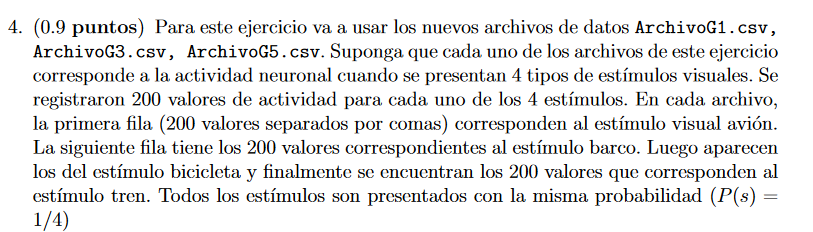

In [5]:
llaves=['1','3','5']

In [6]:
#Avión, Barco, Bicicleta, Tren.
#cargamos los datos
AG1=nrn.importar('ArchivoG1.csv')
AG3=nrn.importar('ArchivoG3.csv')
AG5=nrn.importar('ArchivoG5.csv')
Arch={'1':AG1,'3':AG3,'5':AG5}

In [7]:
len(AG1[0])

200

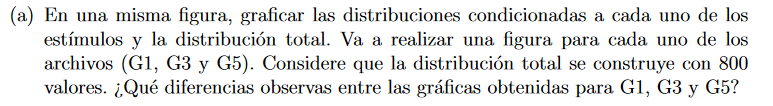

La gráfica para G1 muestra que en ese set de datos las distribuciones condiciondas dado un estímulo están claramente diferenciadas entre si , mientras que en el caso de G3 y G5 esa diferencia es mucho más difusa.

In [6]:
minymax={'1':'m1','3':'m3','5':'m5'}
for llave in llaves:
    m,M=(np.min(np.array(Arch[llave]).flatten()),np.max(np.array(Arch[llave]).flatten()))
    minymax[llave]=(m,M)

In [14]:
llaves2=['avion','barco','bicicleta','tren','dtotal']
ProbArc={'1':'hAG1','3':'hAG3','5':'hAG5'}
for llave in llaves:
    AG={'avion':'list1','barco':'list2','bicicleta':'list3','tren':'list4','dtotal':'list5'}
    total=[]
    for i in range(4):
        counts, bins=np.histogram(Arch[llave][i],bins=20,range=minymax[llave]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
        counts=counts/counts.sum() #convertimos la frecuencia en probabilidad (frecuencia relativa)
        AG[llaves2[i]]=[bins,counts]
    #calculamos bines y probabilidades de la ddistribución total:
    total=np.concatenate(tuple(Arch[llave]))
    counts, bins=np.histogram(total,bins=20,range=minymax[llave]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
    counts=counts/counts.sum() #convertimos la frecuencia en probabilidad
    AG['dtotal']=[bins,counts]
    ProbArc[llave]=AG# diccionario de diccionarios 

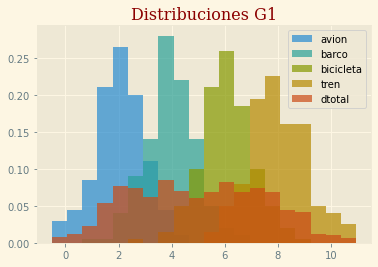

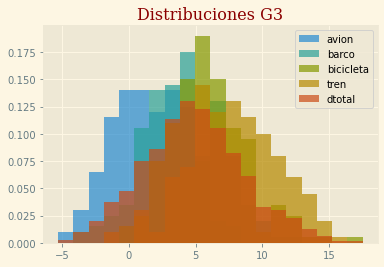

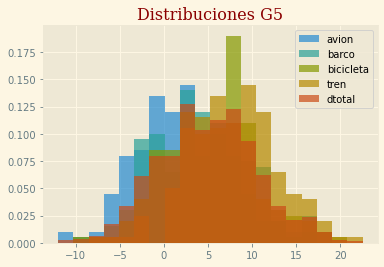

In [18]:
for llave in llaves:
    
    for llave2 in llaves2:
        bins=ProbArc[llave][llave2][0]
        counts=ProbArc[llave][llave2][1]
        plt.hist(bins[:-1],bins,weights=counts,label=[str(llave2)],alpha=0.7) # siguiendo la documentación creamos un histograma usando plt.hist a partir de datos en obtenidos vía np.histogram
        plt.legend()
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
    plt.title("Distribuciones G"+str(llave), fontdict_title)
    plt.show()

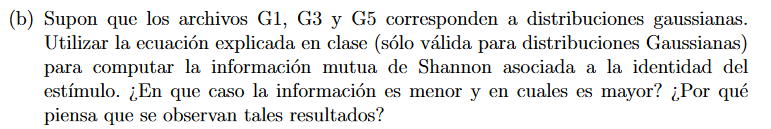

### la información obtenida en AG1 es la mayor y esto se debe a que las distribuciones están condicionadas al estímulo están bastante separadas entre si. En cambio el valor de información más bajo lo obtuve en AG5 y esto se debe en que en los datos de AG5 las distribuciones condicionadas al estímulo están todas mezcladas entre si.

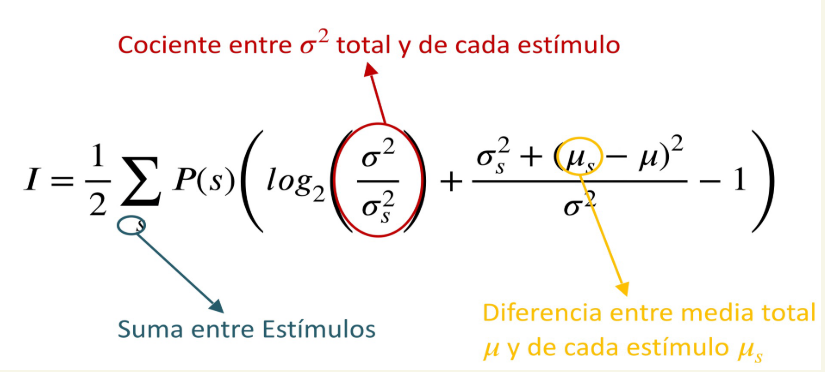

In [9]:
sgstot={'1':'s1','3':'s3','5':'s5'}
mustot={'1':'mu1','3':'mu3','5':'mu5'}
mus={'1':'mu1','3':'mu3','5':'mu5'}
sgs={'1':'s1','3':'s3','5':'s5'}
for llave in llaves:
    mustot[llave]=np.mean(np.array(Arch[llave]).flatten())
    sgstot[llave]=np.std(np.array(Arch[llave]).flatten())
    m=[]
    s=[]
    for i in range(4):
        m.append(np.mean(np.array(Arch[llave][i]).flatten()))
        s.append(np.std(np.array(Arch[llave][i]).flatten()))
    mus[llave]=np.array(m)
    sgs[llave]=np.array(s)
        

In [10]:
def Ishanon_gauss(ps,mutot,mu,sigmatot,sigma):
    """data es los datos correspondientes a un archivo, llaves=son las llaves de los estímulos
    ps=probabilidad de aparición del estímulo
    ptasa=probabilidad de la tasa
    pcondicionada= probabilidad de la tasa condicionada al estímulo
    sigmatot=desviación total (de todos los datos)
    mutot=media total (de todos los datos)
    sigma= un arreglo de sigmas para cada estímulo
    mu= un arreglo de medias para cada estímulo
    """
    sigma2=sigma**2
    sigmatot2=sigmatot**2
    sumandos=[]
    for i in range(4):# un ciclo por cada tipo de estímulo
        s1=(sigma2[i]+np.power((mu[i]-mutot),2))/sigmatot2
        s2=np.log2(sigmatot2/sigma2[i])
        s=s2+s1-1
        sumando=(ps)*s
        sumandos.append(sumando)
    sumandos=np.array(sumandos)
    sumatoria=np.sum(sumandos)
    Im=(1/2)*sumatoria
    return Im

In [11]:
names={'1':'AG1','3':'AG3','5':'AG5'}
for llave in llaves:
    Ishanon=Ishanon_gauss(1/4,mustot[llave],mus[llave],sgstot[llave],sgs[llave])
    print('la información mutua de '+names[llave]+' es:' ,Ishanon,'bits')

la información mutua de AG1 es: 1.3315088056228988 bits
la información mutua de AG3 es: 0.3514692872485077 bits
la información mutua de AG5 es: 0.10785495310544671 bits


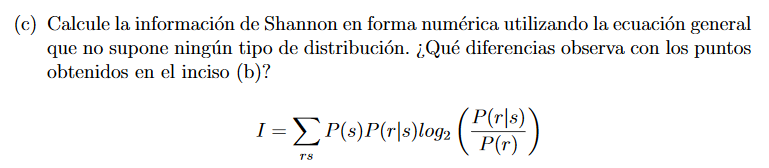

In [22]:
ProbArc['1']['dtotal'][1]

array([0.0075 , 0.01125, 0.0225 , 0.05375, 0.07625, 0.07375, 0.0625 ,
       0.085  , 0.07   , 0.06   , 0.06875, 0.0825 , 0.06875, 0.07375,
       0.06875, 0.045  , 0.04125, 0.0125 , 0.01   , 0.00625])

In [16]:
def I_shanon(data,keys,ps):
    """data es los datos correspondientes a un archivo, llaves=son las llaves de los estímulos
    ps=probabilidad de aparición del estímulo
    ptasa=probabilidad de la tasa
    pcondicionada= probabilidad de la tasa condicionada al estímulo"""
    llaves=keys[0:len(keys)-1]
    ptasa=data[keys[-1]][1]
    Info_stim=[]
    for llave in llaves:
        pcondicionada=data[llave][1]
        Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
        Info_stim.append(Is)
    Ish=ps*np.sum(np.array(Info_stim))
    return Ish

In [17]:
names={'1':'AG1','3':'AG3','5':'AG5'}
shanon=[]
for llave in llaves:
    Ishanon=I_shanon(ProbArc[llave],llaves2,ps=1/4)
    shanon.append(Ishanon)
    print('la información mutua de '+names[llave]+' es:' ,Ishanon,'bits')

la información mutua de AG1 es: 1.252189337901367 bits
la información mutua de AG3 es: 0.3965540340020737 bits
la información mutua de AG5 es: 0.155433783043341 bits


<ipython-input-16-d9faba6be21d>:11: RuntimeWarning: divide by zero encountered in log2
  Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-16-d9faba6be21d>:11: RuntimeWarning: invalid value encountered in multiply
  Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


### los valores obtenidos en los incisos a y b son muy similares sin embargo es curioso que para AG1 el valor que obtuve suponiendo gaussianidad es mayor que el real mientras que para AG3 y AG5 el valor real es mayor que el que obtuve suponiendo gaussianidad. Pero al final son ambos valores son muy similares dado que las distribuciones si son más o menos gaussianas

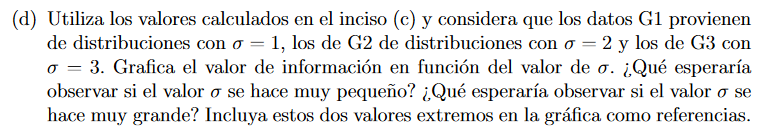

### Esperaria que cuando el valor de sigma es muy pequeño el valor de Información mutua se aproxime a la mayor cantidad de informacion mutua, que es log2 de mi número de estímulos (np.log2(4)),  en contraste mientras la sigma se haga más y más grande esperaría que la informacion de Shannon se aproxime asítoticamente a cero.

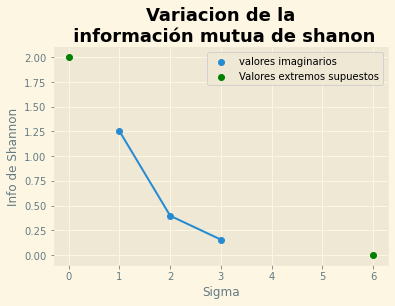

In [74]:
sgimaginario=[1,2,3]
plt.scatter(sgimaginario,shanon,label='valores imaginarios')
plt.plot(sgimaginario,shanon)
plt.scatter([.001,6],[np.log2(4),0.001], color="green", label="Valores extremos supuestos")
plt.title("Variacion de la\n información mutua de shanon",fontsize=18, weight="bold")
plt.xlabel("Sigma")
plt.ylabel("Info de Shannon")
plt.legend(loc="best")
plt.show()

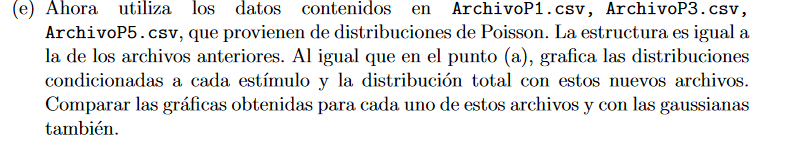

## Aunque no es excesivamente evidente es posible observar que a medida que aumenta la media de la tasa de disparo la distribución se desplaza a la derecha y a la vez empieza a asemejarse a una gaussiana. Sin embargo es mientras la media de la tasa de disparo esta muy a la izquierda (es decir es menor) la distribución de probabilidad se observa cómo estereotípicamente poissoniana

In [75]:
llave3=['1','2','4']

In [76]:
P1=nrn.importar('ArchivoP1.csv')
P2=nrn.importar('ArchivoP2.csv')
P4=nrn.importar('ArchivoP4.csv')
Arch2={'1':P1,'2':P2,'4':P4}

In [77]:
minymax2={'1':'m1','2':'m2','4':'m4'}
for llave in llave3:
    m,M=(np.min(np.array(Arch2[llave]).flatten()),np.max(np.array(Arch2[llave]).flatten()))
    minymax2[llave]=(m,M)

In [78]:
llaves2=['avion','barco','bicicleta','tren','dtotal']
ProbArc2={'1':'hAG1','2':'hAG2','4':'hAG4'}
for llave in llave3:
    AG={'avion':'list1','barco':'list2','bicicleta':'list3','tren':'list4','dtotal':'list5'}
    total=[]
    for i in range(4):
        counts, bins=np.histogram(Arch2[llave][i],bins=20,range=minymax2[llave]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
        counts=counts/counts.sum() #convertimos la frecuencia en probabilidad (frecuencia relativa)
        AG[llaves2[i]]=[bins,counts]
    #calculamos bines y probabilidades de la ddistribución total:
    total=np.concatenate(tuple(Arch2[llave]))
    counts, bins=np.histogram(total,bins=20,range=minymax2[llave]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
    counts=counts/counts.sum() #convertimos la frecuencia en probabilidad
    AG['dtotal']=[bins,counts]
    ProbArc2[llave]=AG# diccionario de diccionarios 

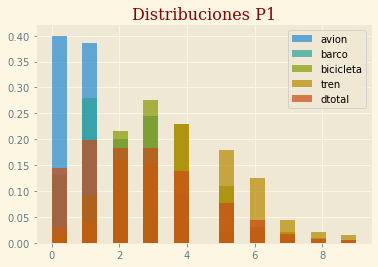

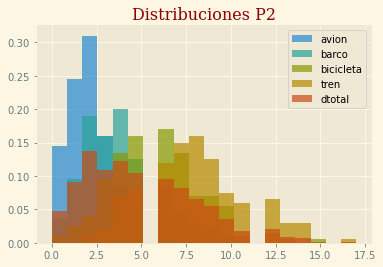

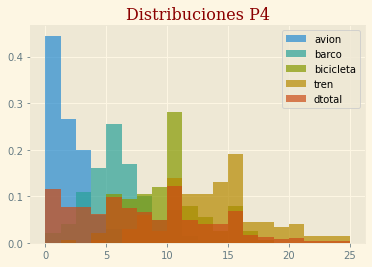

In [80]:
for llave in llave3:
    
    for llave2 in llaves2:
        bins=ProbArc2[llave][llave2][0]
        counts=ProbArc2[llave][llave2][1]
        plt.hist(bins[:-1],bins,weights=counts,label=[str(llave2)],alpha=0.7) # siguiendo la documentación creamos un histograma usando plt.hist a partir de datos en obtenidos vía np.histogram
        plt.legend()
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
    plt.title("Distribuciones P"+str(llave), fontdict_title)
    plt.show()

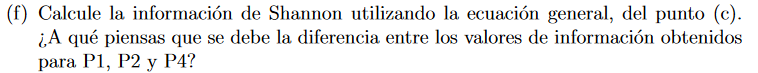

### la diferencia se debe a que para P4 las distribuciones condicionadas dado el estímulo están más separadas entre si , mientras que en el caso de P1 y P2 realmente no hay una diferenciación bien delimitada en las probabilidades condicionadas dado un estímulo.

In [90]:
names={'1':'P1','2':'P2','4':'P4'}
shanon=[]
for llave in llave3:
    Ishanon=I_shanon(ProbArc2[llave],llaves2,ps=1/4)
    shanon.append(Ishanon)
    print('la información mutua de '+names[llave]+' es:' ,Ishanon,'bits')

la información mutua de P1 es: 0.4215826863084714 bits
la información mutua de P2 es: 0.5400155656992207 bits
la información mutua de P4 es: 0.9919276337873932 bits


<ipython-input-72-d9faba6be21d>:11: RuntimeWarning: invalid value encountered in true_divide
  Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-72-d9faba6be21d>:11: RuntimeWarning: divide by zero encountered in log2
  Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-72-d9faba6be21d>:11: RuntimeWarning: invalid value encountered in multiply
  Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


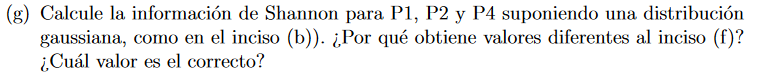

In [91]:
sgstot={'1':'s1','2':'s2','4':'s4'}
mustot={'1':'mu1','2':'mu2','4':'mu4'}
mus={'1':'mu1','2':'mu2','4':'mu4'}
sgs={'1':'s1','2':'s2','4':'s4'}
for llave in llave3:
    mustot[llave]=np.mean(np.array(Arch2[llave]).flatten())
    sgstot[llave]=np.std(np.array(Arch2[llave]).flatten())
    m=[]
    s=[]
    for i in range(4):
        m.append(np.mean(np.array(Arch2[llave][i]).flatten()))
        s.append(np.std(np.array(Arch2[llave][i]).flatten()))
    mus[llave]=np.array(m)
    sgs[llave]=np.array(s)
        

In [92]:
for llave in llave3:
    Ishanon=Ishanon_gauss(1/4,mustot[llave],mus[llave],sgstot[llave],sgs[llave])
    print('la información mutua de '+names[llave]+' es:' ,Ishanon,'bits')

la información mutua de P1 es: 0.457624822985123 bits
la información mutua de P2 es: 0.5904475297028609 bits
la información mutua de P4 es: 1.092667579307397 bits


### Obtengo valores distintos, porque aunque en el inciso g) estoy suponinendo gaussianidad a pesar de que las distribuciones son claramente poissonianas, por lo cuál no es correcto asumir gaussianidad. Justamente por esto mismo es que los valores de información mutua de shanon que obtuve en el inciso f) son los correctos dado que ahí no estamos suponiendo una falsa gaussianidad, y es que lo mejor siempre es no asumir una distribución gaussiana en especial en neurociencias dado que las neuronas rara vez se comportan con distribuciones gaussianas.